In [1]:

import numpy as np
import pandas as pd
import glob
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras
import cv2

In [2]:
df=pd.read_csv(r"C:\Users\gagan\Downloads\TARP1\XSS_dataset.csv",encoding='utf-8-sig')

In [3]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [4]:
df=df[df.columns[-2:]]  # Only get sentence and labels

In [5]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [6]:
# Store only sentences
sentences=df['Sentence'].values
sentences[1]

'<tt onmouseover="alert(1)">test</tt>'

In [7]:
print(len(sentences))

13686


In [8]:
# Function to Convert the data to ASCII Format
def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        if(ord(i)<8222):     
            
            if(ord(i)==8217): 
                sentence_ascii.append(134)
            
            
            if(ord(i)==8221): 
                sentence_ascii.append(129)
                
            if(ord(i)==8220): 
                sentence_ascii.append(130)
                
                
            if(ord(i)==8216): 
                sentence_ascii.append(131)
                
            if(ord(i)==8217): 
                sentence_ascii.append(132)
            
            if(ord(i)==8211): 
                sentence_ascii.append(133)
                
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))
            else:
                    pass
            

    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)

    return zer


In [9]:

#Converting values to ASCII using the the Function created
from PIL import Image as im
arr=np.zeros((len(sentences),100,100))
for i in range(len(sentences)):
    image=convert_to_ascii(sentences[i])
    x=np.asarray(image,dtype='float')
    image = cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)  #Conversion to array of size (100,100)
    image/=128
    arr[i]=image
    


In [10]:
print("Input data shape : ", arr)

Input data shape :  [[[0.46875   0.84375   0.8203125 ... 0.8203125 0.7578125 0.359375 ]
  [0.8671875 0.890625  0.8046875 ... 0.8125    0.90625   0.4765625]
  [0.265625  0.390625  0.4375    ... 0.875     0.9375    0.3515625]
  ...
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]]

 [[0.46875   0.90625   0.90625   ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  ...
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]]

 [[0.0703125 0.25      0.46875   ... 0.8984375 0.7421875 0.7734375]
  [0.7578125 0.890625  0.8984375 ... 0.7890625 0.8828125 0.9140625]
  [0.8203125

In [11]:
# Reshaping the data for input to the CNN model
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [12]:
data.shape

(13686, 100, 100, 1)

In [13]:
#Collecting the labels in the y variable
y=df['Label'].values

In [14]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y,test_size=0.2, random_state=42)

In [15]:
# import Keras Libraries to generate CNN model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

In [16]:
# We are creating a Cnn Model with Number of layers = 11 and Number of Convolutional layer: 3

model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [17]:

#Using Adam Optimization and Binary cross-entropy loss function
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 256)      0

In [18]:
#Creating a Callback function for validation of the accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.97):
            print(" \n Reached 97% + validation accuracy")
            self.model.stop_training=True
callbacks = myCallback()

In [19]:
#Importing sklearn libraries for machine learning algorithms
import sklearn
from sklearn import svm, naive_bayes, ensemble
batch_size = 128
num_epoch = 10
#Training the CNN model
model_log = model.fit(trainX, trainY,
         batch_size=batch_size,
         epochs=num_epoch,
        verbose=1,
       validation_data=( testX,  testY)
                     )
clf_svm = svm.SVC()
# Naive Bayes
clf_nb = naive_bayes.GaussianNB()
# Random Forest
clf_rf = ensemble.RandomForestClassifier()

# Assume X_train is a 4D array with shape (n_samples, height, width, channels) 
# we convert it to a 2D for input to other models
X_train_2d = np.reshape(trainX, (trainX.shape[0], -1))
# Training the models with data
clf_svm.fit(X_train_2d, trainY)
clf_nb.fit(X_train_2d, trainY)
clf_rf.fit(X_train_2d, trainY)


Epoch 1/10
86/86 [==============================] - 158s 2s/step - loss: 0.4395 - accuracy: 0.7884 - val_loss: 0.3948 - val_accuracy: 0.7907
Epoch 2/10
86/86 [==============================] - 116s 1s/step - loss: 0.1973 - accuracy: 0.9270 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 3/10
86/86 [==============================] - 113s 1s/step - loss: 0.0686 - accuracy: 0.9800 - val_loss: 0.0822 - val_accuracy: 0.9763
Epoch 4/10
86/86 [==============================] - 117s 1s/step - loss: 0.0665 - accuracy: 0.9811 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 5/10
86/86 [==============================] - 113s 1s/step - loss: 0.0505 - accuracy: 0.9861 - val_loss: 0.0487 - val_accuracy: 0.9872
Epoch 6/10
86/86 [==============================] - 118s 1s/step - loss: 0.0420 - accuracy: 0.9880 - val_loss: 0.0479 - val_accuracy: 0.9872
Epoch 7/10
86/86 [==============================] - 116s 1s/step - loss: 0.0381 - accuracy: 0.9888 - val_loss: 0.0471 - val_accuracy: 0.9865
Epoch 8/10
86

RandomForestClassifier()

In [20]:
#Prediciting the test set by giving our input test data to the trained models
pred=model.predict(testX)
X_test_2d = np.reshape(testX, (testX.shape[0], -1))
svm_predictions = clf_svm.predict(X_test_2d)
nb_predictions = clf_nb.predict(X_test_2d)
rf_predictions = clf_rf.predict(X_test_2d)

86/86 [==============================] - 6s 71ms/step


In [21]:
# Converting the predicted values to 0 and 1 respectively
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0
for i in range(len(svm_predictions)):
    if svm_predictions[i]>0.5:
        svm_predictions[i]=1
    elif svm_predictions[i]<=0.5:
        svm_predictions[i]=0
for i in range(len(nb_predictions)):
    if nb_predictions[i]>0.5:
        nb_predictions[i]=1
    elif nb_predictions[i]<=0.5:
        nb_predictions[i]=0
for i in range(len(rf_predictions)):
    if rf_predictions[i]>0.5:
        rf_predictions[i]=1
    elif rf_predictions[i]<=0.5:
        rf_predictions[i]=0



In [22]:
# Counting the values that are Correctly predicted and wrongly predicted using various Algorithms
true=0
false=0

for i in range(len(pred)):
    if pred[i] == testY[i]:
        true+=1
    else:
        false+=1
print("CNN PREDICTION")        
print("correct predicted :: ", true)
print("false prediction :: ", false)

true_svm=0
false_svm=0

for i in range(len(svm_predictions)):
    if svm_predictions[i] == testY[i]:
        true_svm+=1
    else:
        false_svm+=1

print("---------------------------------------------------------\n")
print("SVM PREDICTION\n")        
print("correct predicted :: ", true_svm)
print("false prediction :: ", false_svm)

true_nb=0
false_nb=0

for i in range(len(nb_predictions)):
    if nb_predictions[i] == testY[i]:
        true_nb+=1
    else:
        false_nb+=1
print("---------------------------------------------------------\n")
print("NAIVE BAYES PREDICTION\n")          
print("correct predicted :: ", true_nb)
print("false prediction :: ", false_nb)

true_rf=0
false_rf=0

for i in range(len(rf_predictions)):
    if rf_predictions[i] == testY[i]:
        true_rf+=1
    else:
        false_rf+=1
print("---------------------------------------------------------\n")
print("RANDOM FOREST PREDICTION\n")          
print("correct predicted :: ", true_rf)
print("false prediction :: ", false_rf)



CNN PREDICTION
correct predicted ::  2706
false prediction ::  32
---------------------------------------------------------

SVM PREDICTION

correct predicted ::  2674
false prediction ::  64
---------------------------------------------------------

NAIVE BAYES PREDICTION

correct predicted ::  1672
false prediction ::  1066
---------------------------------------------------------

RANDOM FOREST PREDICTION

correct predicted ::  2710
false prediction ::  28


In [23]:
# Counting the Number of attack and benign data in test set
attack=0
benign=0
for i in range(len(testY)):
    if testY[i]==1:
        attack+=1
    else:
        benign+=1

print("Attack data in test set :: ", attack)
print(" Benign data in test set :: ", benign)

Attack data in test set ::  1478
 Benign data in test set ::  1260


### Confusion Matrix

In [24]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [25]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [26]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

In [27]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    
    return (accuracy,
            precision,
           recall)

In [28]:
#Calculating the Accuracy,Precision and Recall for each Model Predictions
accuracy,precision,recall=confusion_matrix(testY,pred)
accuracy_svm,precision_svm,recall_svm=confusion_matrix(testY,svm_predictions)
accuracy_nb,precision_nb,recall_nb=confusion_matrix(testY,nb_predictions)
accuracy_rf,precision_rf,recall_rf=confusion_matrix(testY,rf_predictions)

In [29]:
#Dislaying the Results in a Table Format
print("Model \t\t Accuracy \t\t Precision \t\t Recall")
print("CNN\t\t {0} \t {1} \t {2}".format(accuracy, precision, recall))
print("SVM\t\t {0} \t {1} \t {2}".format(accuracy_svm, precision_svm, recall_svm))
print("Naive Bayes\t {0} \t {1} \t {2}".format(accuracy_nb, precision_nb, recall_nb))
print("Random Forest\t {0} \t {1} \t {2}".format(accuracy_rf, precision_rf, recall_rf))

Model 		 Accuracy 		 Precision 		 Recall
CNN		 0.9883126369612856 	 0.9839357429718876 	 0.9945872801082544
SVM		 0.9766252739225713 	 0.9738605898123325 	 0.983085250338295
Naive Bayes	 0.6106647187728269 	 0.5809748427672956 	 1.0
Random Forest	 0.9897735573411249 	 0.9898648648648649 	 0.9912043301759134


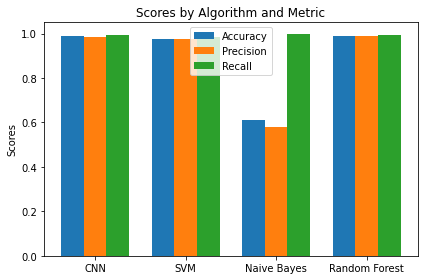

In [30]:
# Plot the scores
acc_scores=[accuracy,accuracy_svm,accuracy_nb,accuracy_rf]
prec_scores=[precision,precision_svm,precision_nb,precision_rf]
rec_scores=[recall,recall_svm,recall_nb,recall_rf]
labels = ['CNN', 'SVM', 'Naive Bayes', 'Random Forest']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, acc_scores, width, label='Accuracy')
rects2 = ax.bar(x, prec_scores, width, label='Precision')
rects3 = ax.bar(x + width, rec_scores, width, label='Recall')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Algorithm and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
